In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [6]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [7]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [8]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [9]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# Let's optimize the memory using appropriate data types
int_cols = df.select_dtypes(include = np.int64)
df[int_cols.columns] = df[int_cols.columns].astype(np.int32)

float_cols = df.select_dtypes(include = np.float64)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

In [12]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
#if there had been duplicate values then what would we do?
df.duplicated().sum()

0

In [14]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756584,174.049271,65.907806,53.724876,2555.565854,126.907317,3.329756,3.255414,10.142536,104.117073,5125.121951,25.219512,30.751220,13276.710938
std,59.322565,1.245307,6.021776,12.337288,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852051
min,1.000000,-2.000000,86.599998,141.100006,60.299999,47.799999,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300003,64.099998,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.199997,65.500000,54.099998,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400002,183.100006,66.900002,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900002,208.100006,72.300003,59.799999,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
df.drop(['car_ID','symboling'],axis =1,inplace = True)

In [16]:
df.isnull().sum()

CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot: xlabel='wheelbase'>

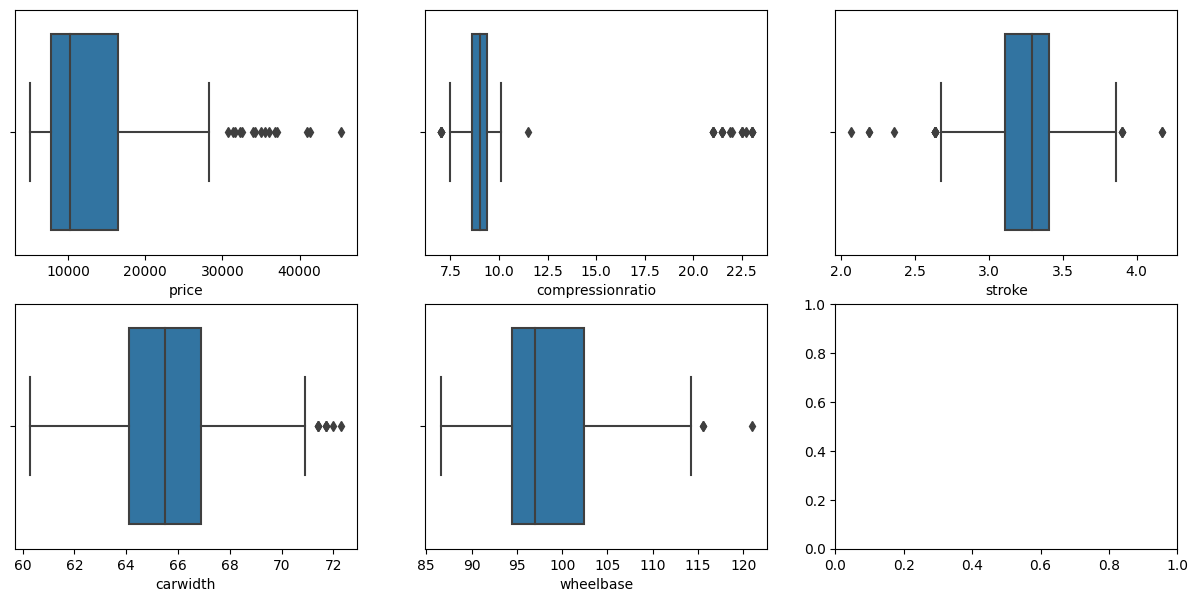

In [17]:
fig,ax = plt.subplots(2,3,figsize=(15,7))

sns.boxplot(x = df['price'],ax=ax[0][0])
sns.boxplot(x = df['compressionratio'],ax=ax[0][1])
sns.boxplot(x = df['stroke'],ax=ax[0][2])
sns.boxplot(x = df['carwidth'],ax=ax[1][0])
sns.boxplot(x = df['wheelbase'],ax=ax[1][1])

In [18]:
#lets create the function to find the lower limit and upper limit
# def find_upper_and_lower_lmt(series):
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     IQR = q3-q1
#     upper_lmt = q3+(1.5*IQR)
#     Lower_lmt = q1-(1.5*IQR)
#     return [upper_lmt,Lower_lmt]

In [19]:
# #lets remove the outliers
# remove_outliers_cols = ['price','stroke','compressionratio','enginesize']
# for col in remove_outliers_cols:
#     lmts = find_upper_and_lower_lmt(df[col])
#     df[col] = df[col][(df[col]< lmts[0]) & (df[col]>lmts[1])]

In [20]:
df['fueltype'] = df['fueltype'].map({'gas':0,'diesel':1})

In [21]:
df['fueltype'].unique()

array([0, 1], dtype=int64)

In [22]:
df['aspiration'] = df['aspiration'].map({'std':2,'turbo':3})

In [23]:
df['aspiration'].unique()

array([2, 3], dtype=int64)

In [24]:
df['doornumber'] = df['doornumber'].map({'two':4,'four':5})

In [25]:
df['doornumber'].unique()

array([4, 5], dtype=int64)

In [26]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [27]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [28]:
df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [29]:
df['enginelocation'] = df['enginelocation'].map({'front':6,'rear':7})

In [30]:
df = pd.get_dummies(columns = ['carbody'],drop_first=True,data = df)

In [31]:
df['drivewheel'] = df['drivewheel'].map({'rwd':8,'fwd':9,'4wd':10})

In [32]:
df = pd.get_dummies(columns = ['CarName'],drop_first=True,data = df)

In [33]:
df = pd.get_dummies(columns = ['fuelsystem'],drop_first=True,data = df)

In [34]:
df = pd.get_dummies(columns = ['cylindernumber'],drop_first=True,data = df)

In [35]:
df = pd.get_dummies(columns = ['enginetype'],drop_first=True,data = df)

In [36]:
#lets create the function to find the lower limit and upper limit
def find_upper_and_lower_lmt(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    upper_lmt = q3+(1.5*IQR)
    Lower_lmt = q1-(1.5*IQR)
    return [upper_lmt,Lower_lmt]

In [37]:
#lets remove the outliers
remove_outliers_cols = ['price','stroke','compressionratio','enginesize']
for col in remove_outliers_cols:
    lmts = find_upper_and_lower_lmt(df[col])
    df[col] = df[col][(df[col]< lmts[0]) & (df[col]>lmts[1])]

In [38]:
df.head(4)

,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0,2,4,8,6,88.599998,168.800003,64.099998,48.799999,2548,...,0,0,0,0,0,0,0,0,0,0
1,0,2,4,8,6,88.599998,168.800003,64.099998,48.799999,2548,...,0,0,0,0,0,0,0,0,0,0
2,0,2,4,8,6,94.500000,171.199997,65.500000,52.400002,2823,...,1,0,0,0,0,0,0,0,1,0
3,0,2,5,9,6,99.800003,176.600006,66.199997,54.299999,2337,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df.shape

(205, 188)

In [40]:
df.dropna(inplace = True)

In [41]:
scaler = StandardScaler()
y = df['price']
X = df.drop(['price'],axis=1)

In [42]:
# Doing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [43]:
#lets normalize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
#Training the  Linear Regression on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)
y_pred

array([-4.49558816e+13, -1.61126711e+04,  2.46580963e+15,  4.45076277e+15,
       -4.49558816e+13,  3.72448004e+15,  3.71237604e+15,  1.77080935e+15,
        7.52788289e+04,  6.22732893e+03,  7.70182893e+03,  7.00507893e+03,
        6.13882893e+03,  3.71237604e+15,  3.72448004e+15,  3.81373447e+15,
       -3.09016826e+16,  4.05174122e+15,  3.72448004e+15,  3.72448004e+15,
        3.18040648e+15,  3.50906947e+16,  1.91245789e+04,  4.23774536e+15,
       -2.25027826e+16,  4.84779951e+15,  3.72448004e+15, -4.49558816e+13,
        3.69165563e+15,  3.58133560e+15])